In [112]:
import numpy as np
import pandas as pd

In [113]:
df=pd.read_csv('athlete_events.csv')
region_df=pd.read_csv('noc_regions.csv')

In [114]:
region_df.head(2)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles


In [115]:
df.shape

(271116, 15)

In [116]:
region_df.shape

(230, 3)

In [117]:
df=df[df['Season']=='Summer']

In [118]:
df.shape

(222552, 15)

In [119]:
df=df.merge(region_df,on='NOC',how='left')

In [120]:
df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN


In [121]:
df['region'].unique().shape

(206,)

In [122]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [123]:
df.duplicated().sum()

1385

In [124]:
df.drop_duplicates(inplace=True)

In [125]:
df.duplicated().sum()

0

In [126]:
df['Medal'].value_counts()

Gold      11456
Bronze    11409
Silver    11212
Name: Medal, dtype: int64

In [127]:
df=pd.concat([df,pd.get_dummies(df['Medal'])],axis=1)

In [128]:
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

,NOC,Gold,Silver,Bronze
0,USA,2472.0,1333.0,1197.0
1,URS,832.0,635.0,596.0
2,GBR,635.0,729.0,620.0
3,GER,592.0,538.0,649.0
4,ITA,518.0,474.0,454.0
...,...,...,...,...
225,AHO,0.0,1.0,0.0
226,LBR,0.0,0.0,0.0
227,LCA,0.0,0.0,0.0
228,LES,0.0,0.0,0.0


In [129]:
medal_tally=df.drop_duplicates(subset=['Team','Year','NOC','Games','Sport','Event','Medal'])

In [130]:
medal_tally=medal_tally.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

In [131]:
medal_tally[medal_tally['NOC']=='IND']

,NOC,Gold,Silver,Bronze
53,IND,9.0,7.0,12.0


In [132]:
years=df['Year'].unique().tolist()

In [133]:
years

[1992,
 2012,
 1920,
 1900,
 1932,
 1952,
 2000,
 1996,
 1912,
 1924,
 1948,
 2008,
 2016,
 2004,
 1984,
 1968,
 1972,
 1988,
 1936,
 1956,
 1960,
 1928,
 1976,
 1980,
 1964,
 1906,
 1904,
 1908,
 1896]

In [134]:
years.sort()

In [135]:
years

[1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [136]:
years.insert(0,'Overall')

In [137]:
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [138]:
country=df['region'].unique()

In [139]:
country=np.unique(df['region'].dropna().values).tolist()

In [140]:
country.sort()


In [141]:
country

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guin

In [142]:
country.insert(0,'Overall')

In [143]:
medal_df=df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [144]:
def fetch_medal_tally(year,country):
    flag=0
    if year=='Overall' and country=='Overall':
        temp_df=medal_df
    if year=='Overall' and country!='Overall':
        flag=1
        temp_df=medal_df[medal_df['region']==country]
    if year!='Overall' and country=='Overall':
        temp_df=medal_df[medal_df['Year']==int(year)]
    if year!='Overall' and country!='Overall':
        temp_df=medal_df[(medal_df['Year']==int(year))&(medal_df['region']==country)]
    if flag==1:
            x=temp_df.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values('Year',ascending=False).reset_index()
    else:
        x=temp_df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()
    x['total']=x['Gold']+x['Silver']+x['Bronze']
    print(x)

In [145]:
fetch_medal_tally(year='Overall',country='India')

    Year  Gold  Silver  Bronze  total
0   2016     0       1       1      2
1   2012     0       2       4      6
2   2008     1       0       2      3
3   2004     0       1       0      1
4   2000     0       0       1      1
5   1996     0       0       1      1
6   1992     0       0       0      0
7   1988     0       0       0      0
8   1984     0       0       0      0
9   1980     1       0       0      1
10  1976     0       0       0      0
11  1972     0       0       1      1
12  1968     0       0       1      1
13  1964     1       0       0      1
14  1960     0       1       0      1
15  1956     1       0       0      1
16  1952     1       0       1      2
17  1948     1       0       0      1
18  1936     1       0       0      1
19  1932     1       0       0      1
20  1928     1       0       0      1
21  1924     0       0       0      0
22  1920     0       0       0      0
23  1900     0       2       0      2


In [146]:
df['Year'].unique().shape[0]-1

28

In [147]:
df['City'].unique().shape[0]

23

In [148]:

df['Sport'].unique().shape[0]

52

In [149]:
df['Event'].unique().shape[0]

651

In [150]:
df['Name'].unique().shape[0]

116122

In [151]:
df['region'].unique().shape[0]

206

In [158]:
nations=df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('index')

In [159]:
Lx=[]
Ly=[]

In [162]:
Ly=nations['index']

In [163]:
Lx=nations['Year']

In [164]:
import matplotlib.pyplot as plt

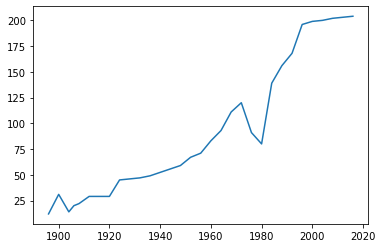

In [166]:
plt.plot(Ly,Lx)

In [172]:
a_over_time=df.drop_duplicates(['Year','Name'])['Year'].value_counts().reset_index().sort_values('index')

In [173]:
Lxa=[]
Lya=[]
Lxa=a_over_time['index']
Lya=a_over_time['Year']

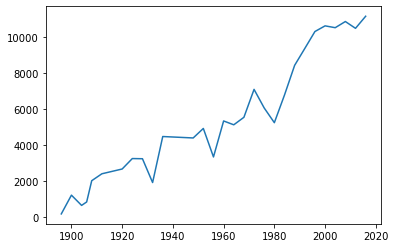

In [174]:
plt.plot(Lxa,Lya)

In [180]:
xd=df.drop_duplicates(['Year','Sport','Event'])

<AxesSubplot:xlabel='Year', ylabel='Sport'>

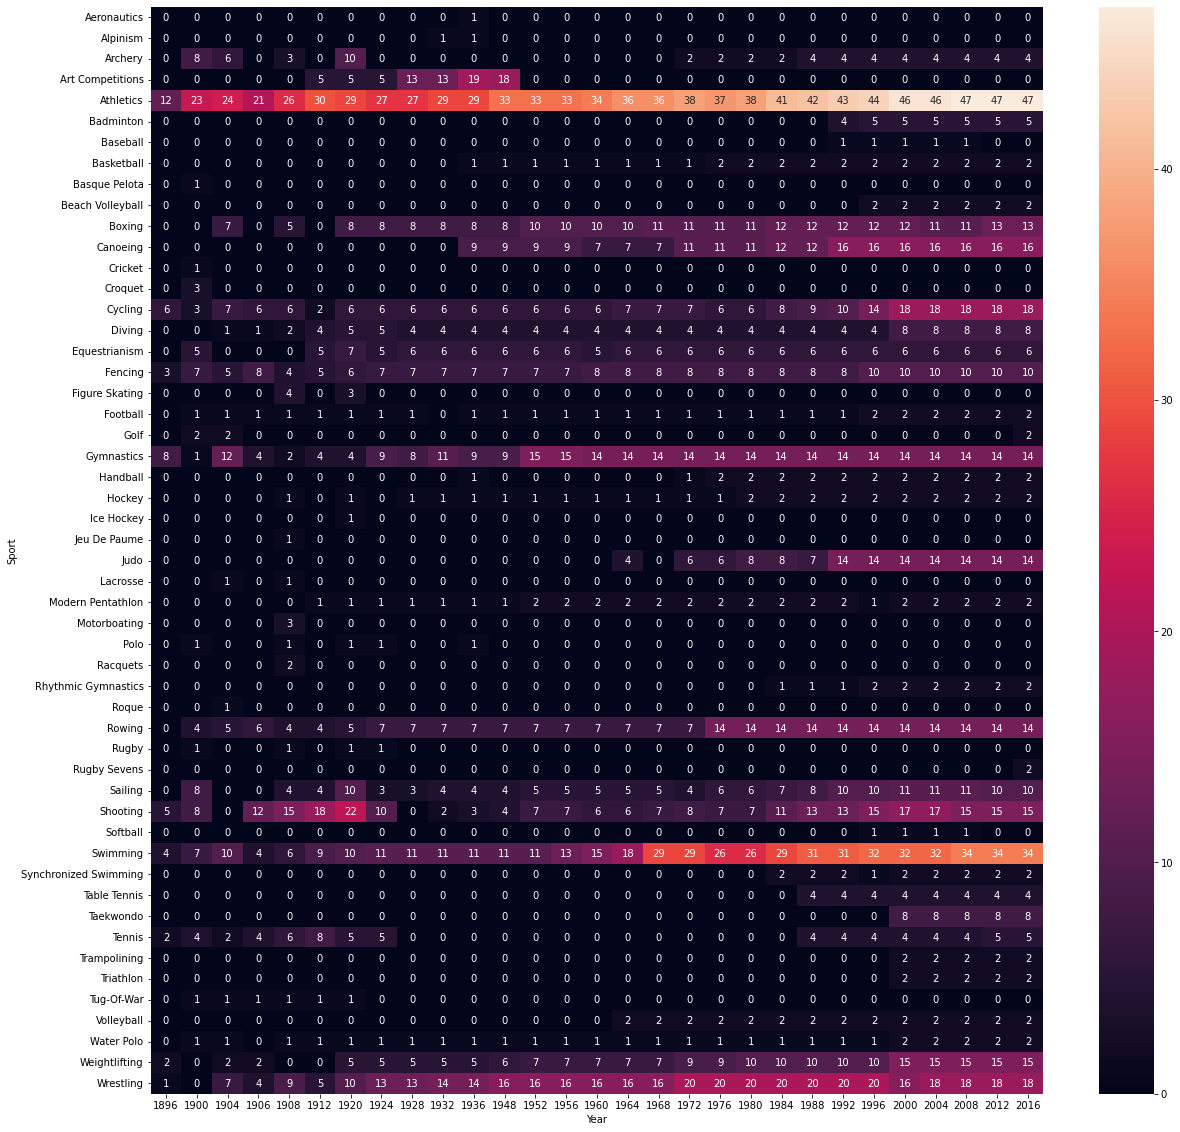

In [190]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(xd.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype(int),annot=True)

In [202]:
df.groupby('Name').cumsum()['Medal']

KeyError: 'Medal'

In [203]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN,0,0,0
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN,0,0,0
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0


In [210]:
p=df.groupby('Name').cumsum()[['Gold','Silver','Bronze']]
p['total']=p['Gold']+p['Silver']+p['Bronze']

In [213]:
pp=p.sort_values('total')

In [216]:
pp.shape

(221167, 4)